# Loan Data from Prosper Exploration

## by Khaled B. ElTantawy

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each 
loan, including loan amount, borrower rate (or interest rate), 
current loan status, borrower income, and many others.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> First step is to Load the dataset

In [2]:
# load in the dataset into a pandas dataframe
Loan_df = pd.read_csv('prosperLoanData.csv')
#print the first and last 5 rows
Loan_df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


## Data Cleaning

In [3]:
# We start with checking for NULL to know how to clean the dataframe
Loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
#Then we check for duplicated rows
Loan_df.duplicated().sum()

0

### *Now we study each column with nan value to choose if we can neglect it*

**CreditGrade** can be dropped becasue it's only applicable before 2009, can be neglected

**Closed date** is applicable for Cancelled, Completed, Chargedoff and Defaulted loan statuses, can be neglected

**ProsperPaymentsLessThanOneMonthLate**, not enough data -> can be neglected

**ProsperPaymentsOneMonthPlusLate**, not enough data -> can be neglected

**ProsperPrincipalBorrowed**, not enough data -> can be neglecte

**rosperPrincipalOutstanding**, not enough data -> can be neglected

**ScorexChangeAtTimeOfListing**, not enough data -> can be neglected

**LoanFirstDefaultedCycleNumber**, not enough data -> can be neglected

**GroupKey**, not enough data -> can be neglected

> We will chose to study the following variables

**Term**: The length of the loan expressed in months.

**BorrowerAPR**:The Borrower's Annual Percentage Rate (APR) for the loan.

**BorrowerRate**:The Borrower's interest rate for this loan. 

**EstimatedEffectiveYield**:Effective yield is equal to the borrower interest rate (i) minus the servicing fee rate, (ii) minus estimated uncollected interest on charge-offs, (iii) plus estimated collected late fees.  Applicable for loans originated after July 2009.

**IsBorrowerHomeowner**:A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.

**CurrentlyInGroup**:Specifies whether or not the Borrower was in a group at the time the listing was created.

**StatedMonthlyIncome**: The monthly income the borrower stated at the time the listing was created.

**IncomeRange**: The income range of the borrower at the time the listing was created.

**LoanOriginalAmount**: The origination amount of the loan.

In [5]:
Loan_df[Loan_df['ProsperRating (Alpha)']=='N/A']

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors


In [6]:
# Now we select the columns that will be used in the datafram that we will analyze
usable_cols = ['ListingNumber','ListingCreationDate','Term','BorrowerAPR','BorrowerRate','EstimatedEffectiveYield'
               ,'ProsperRating (Alpha)','IsBorrowerHomeowner','CurrentlyInGroup','EmploymentStatus'
               ,'StatedMonthlyIncome','MonthlyLoanPayment','LoanOriginalAmount']
new_load_df=Loan_df[usable_cols]
new_load_df.head()

,ListingNumber,ListingCreationDate,Term,BorrowerAPR,BorrowerRate,EstimatedEffectiveYield,ProsperRating (Alpha),IsBorrowerHomeowner,CurrentlyInGroup,EmploymentStatus,StatedMonthlyIncome,MonthlyLoanPayment,LoanOriginalAmount
0,193129,2007-08-26 19:09:29.263000000,36,0.16516,0.1580,NaN,NaN,True,True,Self-employed,3083.333333,330.43,9425
1,1209647,2014-02-27 08:28:07.900000000,36,0.12016,0.0920,0.07960,A,False,False,Employed,6125.000000,318.93,10000
2,81716,2007-01-05 15:00:47.090000000,36,0.28269,0.2750,NaN,NaN,False,True,Not available,2083.333333,123.32,3001
3,658116,2012-10-22 11:02:35.010000000,36,0.12528,0.0974,0.08490,A,True,False,Employed,2875.000000,321.45,10000
4,909464,2013-09-14 18:38:39.097000000,36,0.24614,0.2085,0.18316,D,True,False,Employed,9583.333333,563.97,15000


In [7]:
# We start with checking for NULL for the new dataframe
new_load_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ListingNumber            113937 non-null  int64  
 1   ListingCreationDate      113937 non-null  object 
 2   Term                     113937 non-null  int64  
 3   BorrowerAPR              113912 non-null  float64
 4   BorrowerRate             113937 non-null  float64
 5   EstimatedEffectiveYield  84853 non-null   float64
 6   ProsperRating (Alpha)    84853 non-null   object 
 7   IsBorrowerHomeowner      113937 non-null  bool   
 8   CurrentlyInGroup         113937 non-null  bool   
 9   EmploymentStatus         111682 non-null  object 
 10  StatedMonthlyIncome      113937 non-null  float64
 11  MonthlyLoanPayment       113937 non-null  float64
 12  LoanOriginalAmount       113937 non-null  int64  
dtypes: bool(2), float64(5), int64(3), object(3)
memory usage: 9

### *Now we fix the NaN values*

**For Borrow APR**, we will rwplace NaN with the mean

**For EstimatedEffectiveYield**, we will replace NaN with 0, because the NaN represented the loans before 2009 when those variables were not caculated

**For ProsperRating (Alpha)**, we will replace NaN with N/A, because the NaN represented the loans before 2009 when those variables were not caculated

**For EmploymentStatus**, we will replace NaN with 'Not available'

In [8]:
#Here, we apply what we said in the last cell
new_load_df.BorrowerAPR.fillna(inplace=True, value = new_load_df.BorrowerAPR.mean())
new_load_df.EstimatedEffectiveYield.fillna(inplace=True, value = 0)
new_load_df['ProsperRating (Alpha)'].fillna(inplace=True, value = 'before 2009 (not Rated)')
new_load_df.EmploymentStatus.fillna(inplace=True, value = 'Not available')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [9]:
#Check if the changes were applied
new_load_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ListingNumber            113937 non-null  int64  
 1   ListingCreationDate      113937 non-null  object 
 2   Term                     113937 non-null  int64  
 3   BorrowerAPR              113937 non-null  float64
 4   BorrowerRate             113937 non-null  float64
 5   EstimatedEffectiveYield  113937 non-null  float64
 6   ProsperRating (Alpha)    113937 non-null  object 
 7   IsBorrowerHomeowner      113937 non-null  bool   
 8   CurrentlyInGroup         113937 non-null  bool   
 9   EmploymentStatus         113937 non-null  object 
 10  StatedMonthlyIncome      113937 non-null  float64
 11  MonthlyLoanPayment       113937 non-null  float64
 12  LoanOriginalAmount       113937 non-null  int64  
dtypes: bool(2), float64(5), int64(3), object(3)
memory usage: 9

### *Now we fix some data types*

**ListingCreationDate** change the type to date time the keep the date only


In [10]:
#Here, we apply what we said in the last cell
new_load_df.ListingCreationDate = pd.to_datetime(new_load_df.ListingCreationDate, format="%Y-%m-%d")
new_load_df.ListingCreationDate

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0        2007-08-26 19:09:29.263
1        2014-02-27 08:28:07.900
2        2007-01-05 15:00:47.090
3        2012-10-22 11:02:35.010
4        2013-09-14 18:38:39.097
                   ...          
113932   2013-04-14 05:55:02.663
113933   2011-11-03 20:42:55.333
113934   2013-12-13 05:49:12.703
113935   2011-11-14 13:18:26.597
113936   2014-01-15 09:27:37.657
Name: ListingCreationDate, Length: 113937, dtype: datetime64[ns]

In [11]:
new_load_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   ListingNumber            113937 non-null  int64         
 1   ListingCreationDate      113937 non-null  datetime64[ns]
 2   Term                     113937 non-null  int64         
 3   BorrowerAPR              113937 non-null  float64       
 4   BorrowerRate             113937 non-null  float64       
 5   EstimatedEffectiveYield  113937 non-null  float64       
 6   ProsperRating (Alpha)    113937 non-null  object        
 7   IsBorrowerHomeowner      113937 non-null  bool          
 8   CurrentlyInGroup         113937 non-null  bool          
 9   EmploymentStatus         113937 non-null  object        
 10  StatedMonthlyIncome      113937 non-null  float64       
 11  MonthlyLoanPayment       113937 non-null  float64       
 12  LoanOriginalAmou

In [12]:
# descriptive statistics for numeric variables
print(new_load_df.describe())

       ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113937.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080355       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209790       0.184000   
75%     8.926340e+05      36.000000       0.283700       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

       EstimatedEffectiveYield  StatedMonthlyIncome  MonthlyLoanPayment  \
count            113937.000000         1.139370e+05       113937.000000   
mean                  0.125608         5.608026e+03          272.475783   
std                   0.094335         7.478497e+03          192.697812   
min                  -0.182700         0.000000e+00            0.000000   
25%

> Then we describe its properties through the questions below.


### What is the structure of your dataset?

> There are 113937 Loans in the dataset with 10 variables 

> For the columns ('Term','BorrowerAPR','BorrowerRate','EstimatedEffectiveYield'
,'ProsperScore','ListingCategory (numeric)','StatedMonthlyIncome'
,'IncomeRange','LoanOriginalAmount'). -----> All variables are numeric

> For the column ('EmploymentStatus') -----> All variables are string

> For the columns('IsBorrowerHomeowner','CurrentlyInGroup') -----> All variables are Boolean

> For the columns ('ListingNumber','ListingCreationDate') -----> Are identefierss and will be used for some analysis

**ListingNumber**: This will be used as and identefier 

**ListingCreationDate**: will be used in the analysis and categorise according to year and month
### What is/are the main feature(s) of interest in your dataset?

<ul>
<li>Predicting the rate that the number of loans increase with</li>
<li>check if the month affect number of loans</li>
<li>study how the StatedMonthlyIncome  related to other</li>
</ul>


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Mainly we will start with the relationship between year/month and different loans/loaners features 

> Then we Will study the relation between the loan featurs and the borrowers features

> We will study the relationship between each Feature and the count

> We will study the relationship between each numeric and categoric variable (two at a time)

> We will study the relationship 
between each **numeric variables vs (year or EmploymentStatus) vs (LoanOriginalAmount or  BorrowerAPR)**

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [13]:
#We devided the numerical and catagorical features because we will need  to use it
#by looping on the lists

numeric_vars = ['Term', 'BorrowerAPR', 'BorrowerRate', 'EstimatedEffectiveYield'
                , 'StatedMonthlyIncome','MonthlyLoanPayment','LoanOriginalAmount']
categoric_vars = ['IsBorrowerHomeowner', 'ProsperRating (Alpha)','EmploymentStatus']

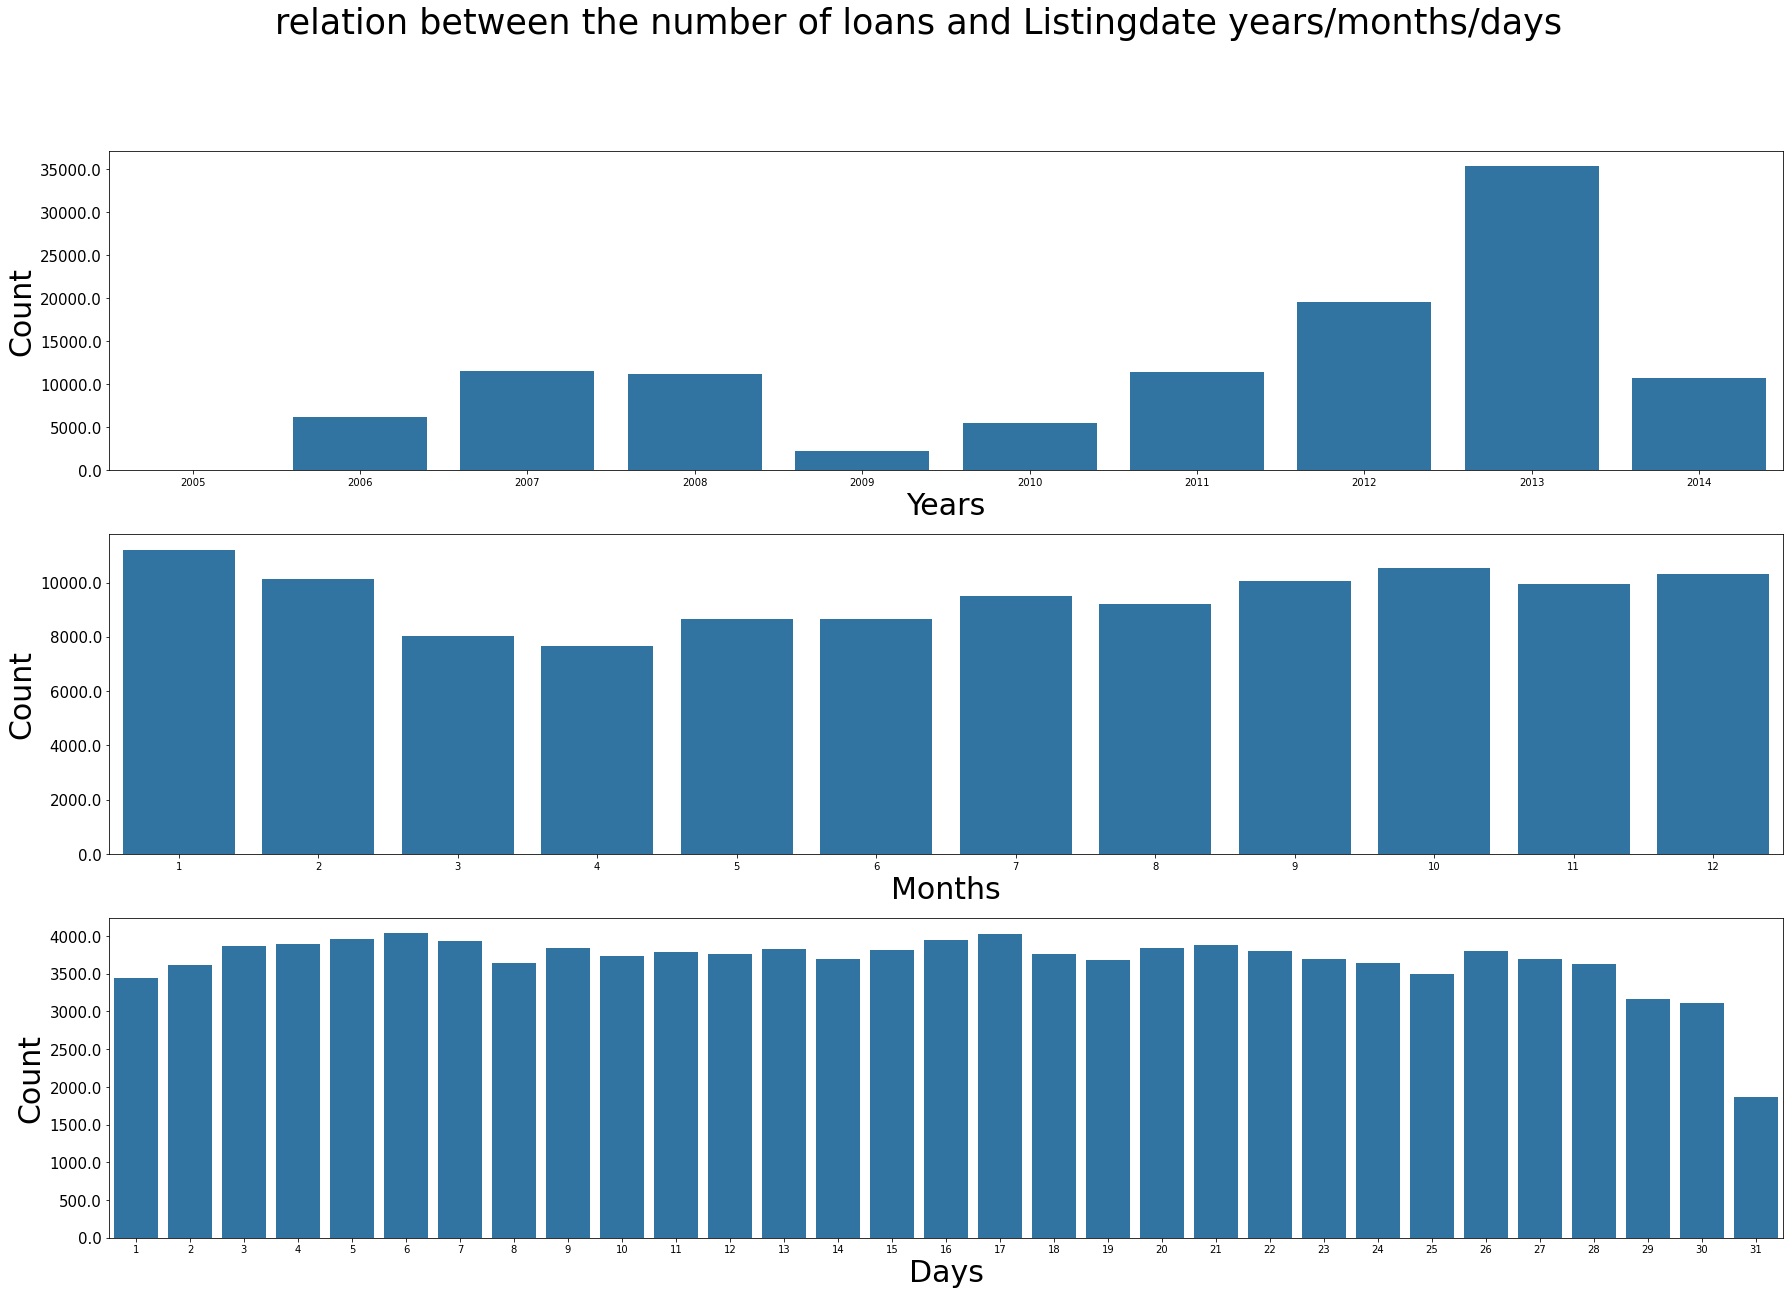

In [14]:
#Here, we study the relation between the number of loans and Listingdate
# the first graph is for years, the second graph is for months and the last one is for days


date = [new_load_df.ListingCreationDate.dt.year,new_load_df.ListingCreationDate.dt.month
        ,new_load_df.ListingCreationDate.dt.day]

dateN = ['Years','Months','Days']

fig, ax = plt.subplots(nrows = 3 , figsize = [30,20])
fig.suptitle("relation between the number of loans and Listingdate years/months/days",fontsize=35)
for i in range(len(date)):
    
    sb.countplot(x=date[i], data=new_load_df, ax = ax[i], color=sb.color_palette()[0])
    ax[i].set_xlabel(dateN[i],fontsize=30)
    ax[i].set_ylabel("Count",fontsize=30)
    
    ax[i].set_yticklabels(ax[i].get_yticks(), size = 15)

plt.show()

> About the plot **relation between the number of loans and Listingdate years/months/days**
We notice that the loans was **the highest on 2013** and **lowest on 2005**

### Now, let's study the hysteresis of the numerical variables

> I will print the numerical variables first to make it easier

In [15]:
for i in numeric_vars:
    print((i +": Min = {}"+", MAx = {}\n").format(new_load_df[i].min(),new_load_df[i].max()))

Term: Min = 12, MAx = 60

BorrowerAPR: Min = 0.006529999999999999, MAx = 0.5122899999999999

BorrowerRate: Min = 0.0, MAx = 0.4975

EstimatedEffectiveYield: Min = -0.1827, MAx = 0.3199

StatedMonthlyIncome: Min = 0.0, MAx = 1750002.916667

MonthlyLoanPayment: Min = 0.0, MAx = 2251.51

LoanOriginalAmount: Min = 1000, MAx = 35000



Text(0.5, 1.0, 'relationship between the number of loans and Term')

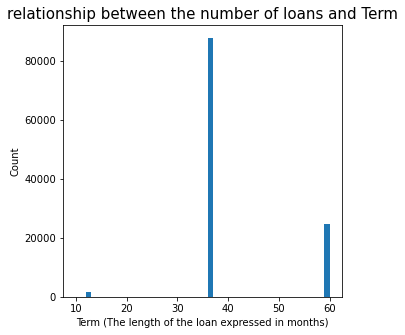

In [16]:
# Now let's study the Term
bins = np.arange(10, new_load_df.Term.max()+0.005, 1)
plt.figure(figsize=[5, 5])
plt.hist(data = new_load_df, x = 'Term',bins=bins);
plt.xlabel('Term (The length of the loan expressed in months)');
plt.ylabel('Count');
plt.title("relationship between the number of loans and Term",fontsize=15)

> The previous graph is **Logical**, as the values are  integer so **the bars will not intersect** and we can see that 

>about **77%** of the **Term values** are **36**

>and about **21.6%** of the **Term values** are **36**

>and about **1.4%** of the **Term values** are **12**

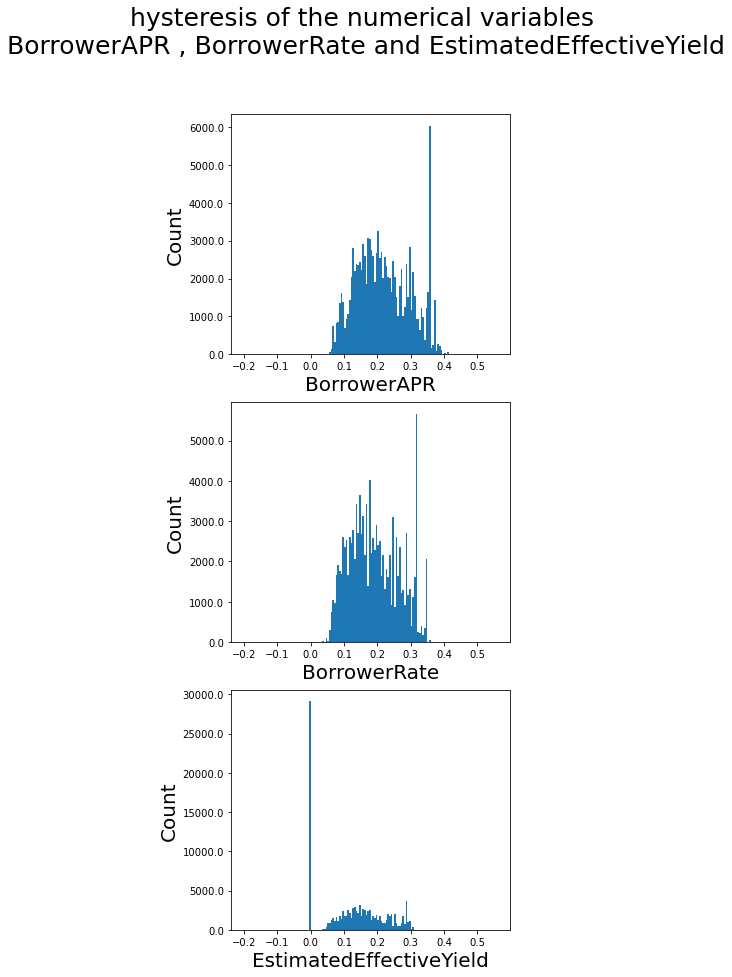

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [17]:
# Now let's study the BorrowerAPR and BorrowerRate and EstimatedEffectiveYield
bins = np.arange(-.2, new_load_df.BorrowerAPR.max()+0.05, 0.005)
vars=['BorrowerAPR','BorrowerRate','EstimatedEffectiveYield']

fig, ax = plt.subplots(nrows = 3 , figsize = [5,15]);
fig.suptitle("hysteresis of the numerical variables \nBorrowerAPR , BorrowerRate and EstimatedEffectiveYield",fontsize=25);

for i in range(len(vars)):
    var = vars[i];
    plt.figure(figsize=[5, 5])
    ax[i].hist(data = new_load_df, x = var, bins = bins);        
        
    ax[i].set_xlabel(var,fontsize=20);
    ax[i].set_ylabel("Count",fontsize=20);
    ax[i].set_yticklabels(ax[i].get_yticks(), size = 10);

> The previous graph is **Logical**, as the values are  **float** so **the bars will intersect** and we can see that 

>About **5%** of the **Borrower values** are **0.36** 
and the rest **95%** are between **.05 and 0.4** all of them count less than 3000

>About **5%** of the **BorrowerRate values** are **0.32** 
and the rest **95%** are between **.05 and 0.3** all of them count less than 4000

>About **25.5%** of the **EstimatedEffectiveYield values** are **0** 
and the rest **74.5%** are between **.05 and 0.3199** all of them count less than 5000

#### For the StatedMonthlyIncome

>the value reaches 1750000, which is very hard to plot at will result in a usless figure

>but we know for a fact that most of the loans are no more than 100000

>so, we will check the to see the suitable plot range where we can find most of the loans

In [18]:
new_load_df.query('StatedMonthlyIncome > 100000' )['StatedMonthlyIncome'].count()

17

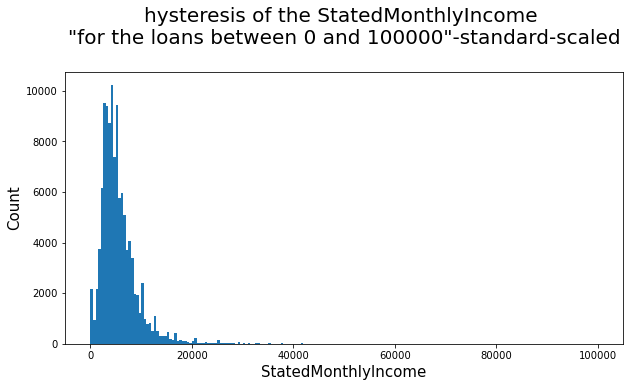

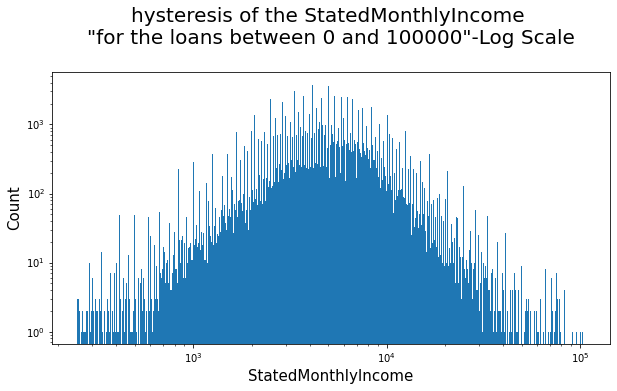

In [19]:
# Now let's study the StatedMonthlyIncome for the loans between 0 and 100000 
bins = np.arange(0, 100001, 500)
plt.figure(figsize=[10, 5])


plt.hist(data = new_load_df, x = 'StatedMonthlyIncome', bins=bins);
plt.title("hysteresis of the StatedMonthlyIncome \n\"for the loans between 0 and 100000\"-standard-scaled\n",fontsize=20);
plt.xlabel('StatedMonthlyIncome',fontsize=15);
plt.ylabel('Count',fontsize=15);

logbins = 10 ** np.arange(2.4, np.log10(100000)+0.025, 0.005)
plt.figure(figsize=[10, 5])

plt.hist(data = new_load_df, x = 'StatedMonthlyIncome',log=True ,bins=logbins);
plt.title("hysteresis of the StatedMonthlyIncome \n\"for the loans between 0 and 100000\"-Log Scale\n",fontsize=20);
plt.xlabel('StatedMonthlyIncome',fontsize=15);
plt.xscale('log')
plt.ylabel('Count',fontsize=15);

plt.show()

> Most borrowers have a monthly income of around 5,000. 

> This distribution is right skewed with some long tails

> only 17 borrower a monthly income have more than 100000

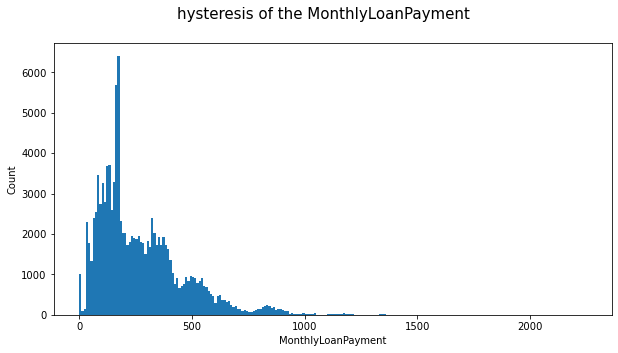

In [20]:
# Now let's study the MonthlyLoanPayment

bins = np.arange(0, 2252, 10)
plt.figure(figsize=[10, 5])
plt.hist(data = new_load_df, x = 'MonthlyLoanPayment', bins=bins);
plt.suptitle("hysteresis of the MonthlyLoanPayment",fontsize=15);
plt.xlabel('MonthlyLoanPayment',fontsize=10);
plt.ylabel('Count',fontsize=10);

> Most loans paidmonthly income of around 100-400, with a spike at 200. 

> This distribution is right skewed

> The reason why the number most monthly paid load is higher when the payemet is low, because most loan values are low 
(Less than 5000) which means the payment are low too

> It's logical that there are about a 1000 loans which has 0 monthly payment, because some **big** loans have payments schadualed quarter yearly or even yearly

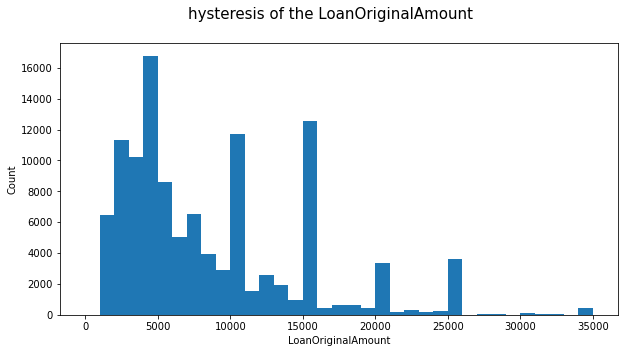

In [21]:
# Now let's study the LoanOriginalAmount
bins = np.arange(0, 35001, 1000)
plt.figure(figsize=[10, 5])
plt.hist(data = new_load_df, x = 'LoanOriginalAmount', bins=bins);
plt.suptitle("hysteresis of the LoanOriginalAmount",fontsize=15);
plt.xlabel('LoanOriginalAmount',fontsize=10);
plt.ylabel('Count',fontsize=10);

> Most loans are around 1000 to 7000, with a spikes at arount 4000, 11000,16000 .

> The spikes represent arount 35% of the number of loans

> This distribution is right skewed wth long tail

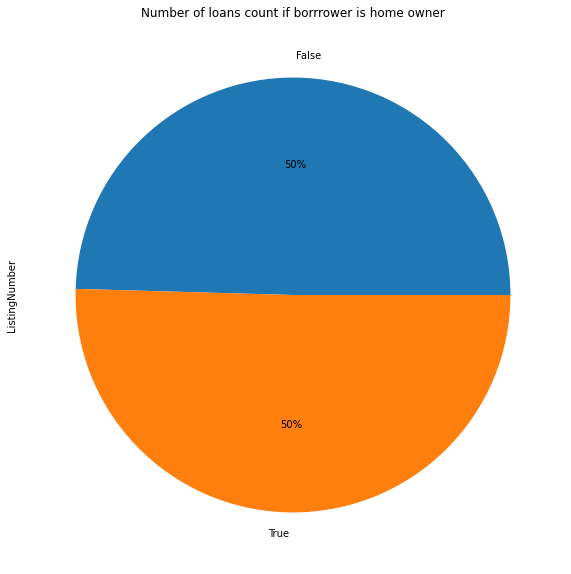

In [22]:
ax = new_load_df.groupby(new_load_df.IsBorrowerHomeowner)['ListingNumber'].count().\
plot(kind = 'pie',figsize=(10,10),title='Number of loans count if borrrower is home owner',autopct='%1.0f%%')

> Half the borrowers are home owners 

> Half the borrowers don't own a home

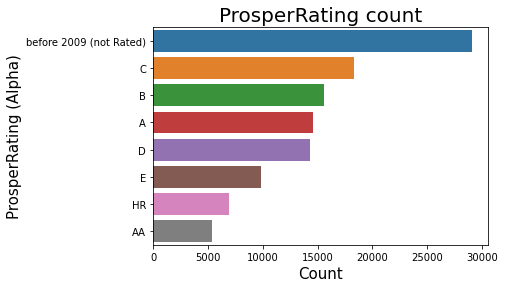

In [23]:
#Here, we study the relation between the number of loans and 'ProsperRating (Alpha)'
# the first graph is for years, the second graph is for months and the last one is for days

    
sb.countplot(y='ProsperRating (Alpha)', data=new_load_df,order=new_load_df['ProsperRating (Alpha)'].value_counts().index)
plt.ylabel('ProsperRating (Alpha)',fontsize=15)
plt.xlabel("Count",fontsize=15)
plt.title("ProsperRating count",fontsize=20)
plt.show()

> The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009.

> The highest rate number of loans is C and the lowest number rate is  AA

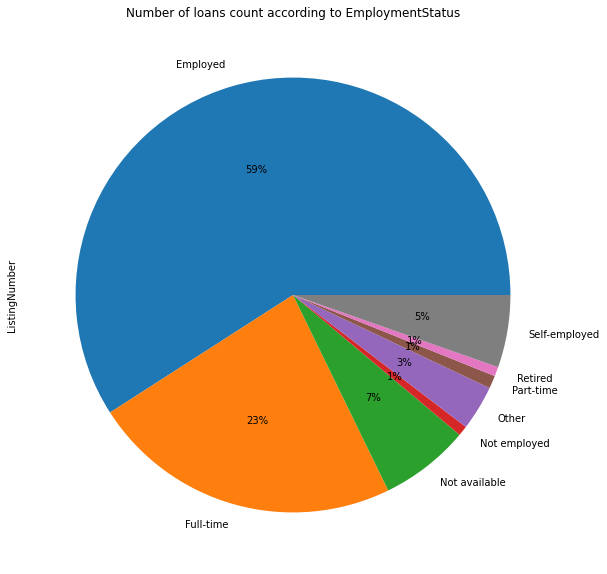

In [24]:
ax = new_load_df.groupby(new_load_df.EmploymentStatus)['ListingNumber'].count().\
plot(kind = 'pie',figsize=(10,10),title='Number of loans count according to EmploymentStatus',autopct='%1.0f%%')

> About 59% of the borrowers are Employed 

> About 23% of the borrowers are Retired

> About 7% of the borrowers EmploymentStatus are not available

> About 5% of the borrowers are Self-employed

> About 1% of the borrowers are not Employed

> About 1% of the borrowers are Retired

> About 1% of the borrowers are Part-Time

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>the value reaches 1750000, which is very hard to plot at will result in a usless figure

>but we know for a fact that only 17 borrowers with more than 100000 monthly income

>We ploted only the loans that their borrowers have less than 100000 income 

> then we plotted the same graph wiith a logscale for a better visualization

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> **For Borrow APR**, we will rwplace NaN with the mean, a it will represent a suitable value for the **Annual Percentage Rate** if we took it along the whole period

> **For EstimatedEffectiveYield**, we will replace NaN with 0, because the NaN represented the loans before 2009 when those variables were not caculated

> **For ProsperRating (Alpha)**, we will replace NaN with N/A, because the NaN represented the loans before 2009 when those variables were not caculated

> **EmploymentStatus**, all the nan values were replaced by **not available**, as some workers tend to leave the cell 
embty when they don't have information about omething and what it means with **not available** 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### We start with the correletion plot between all the numerical features

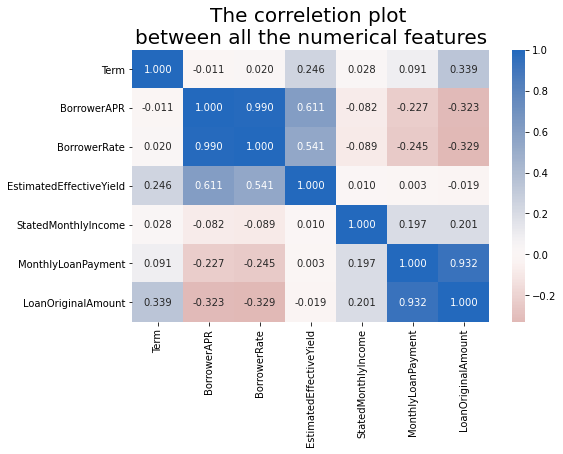

In [25]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(new_load_df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title("The correletion plot \nbetween all the numerical features",size=20)
plt.show()

> most of the features don't have strong relationship between eachother

> only four features have high effect each other:

>> BorrowerAPR with BorrowerRate

>> MonthlyLoanPayment with LoanOriginalAmount

### Then the matrix plot between all the numerical features

Text(0.5, 0.98, 'the Matrix plot (scatter) \nbetween all the numerical features')

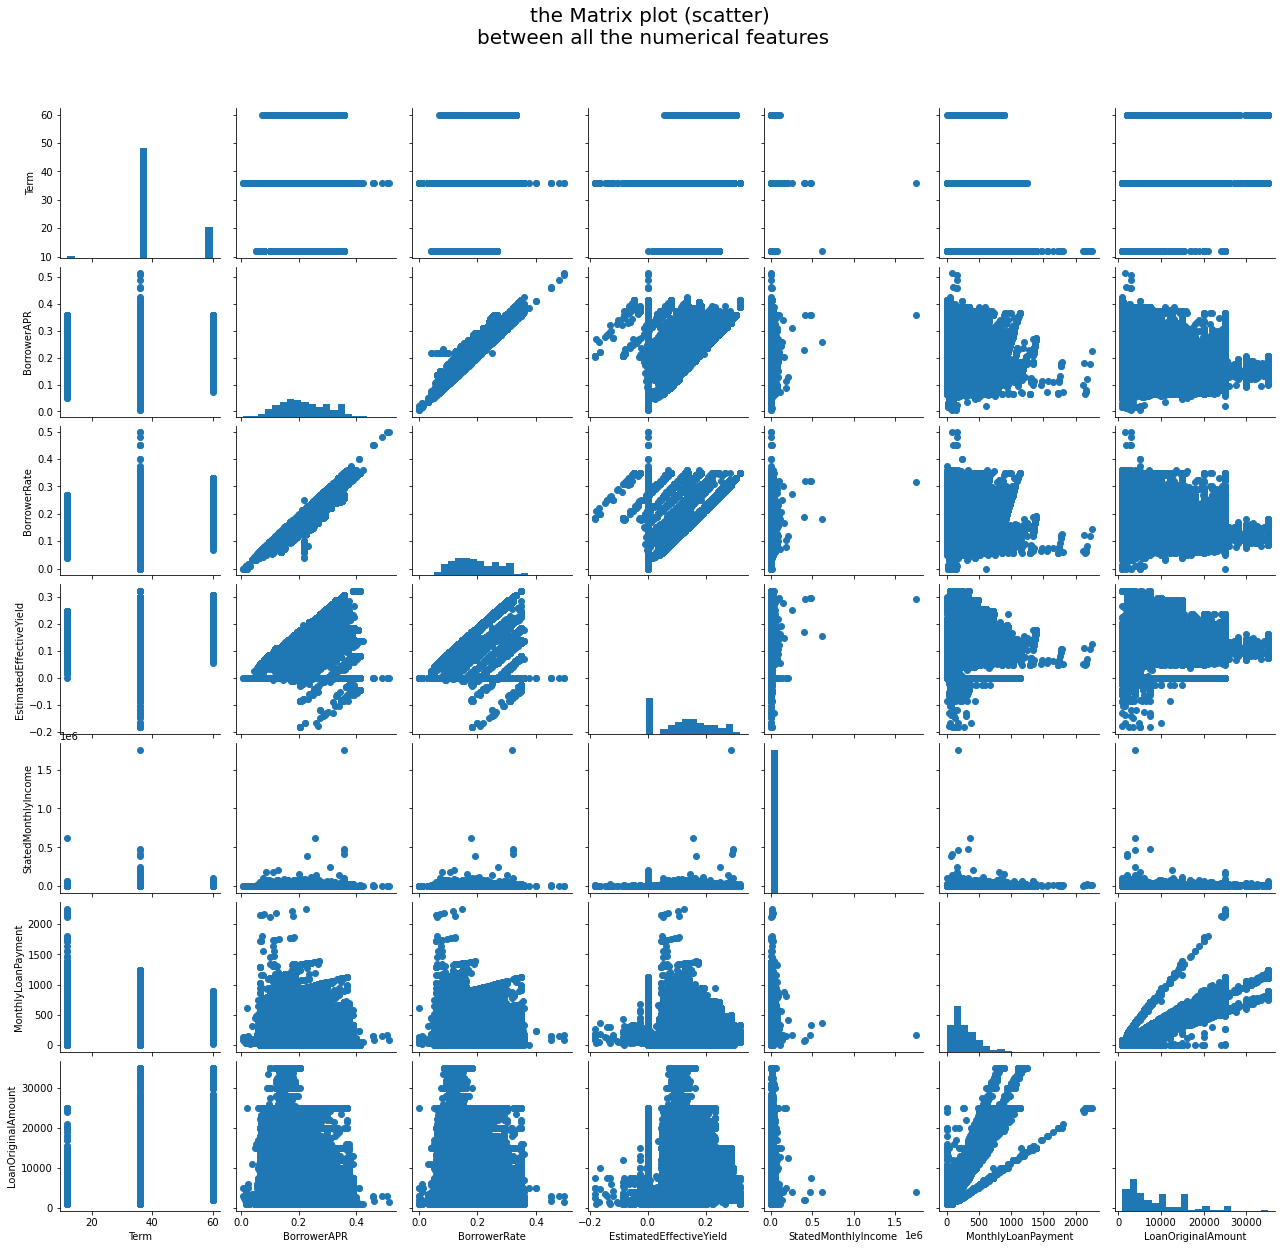

In [26]:
# plot matrix
g = sb.PairGrid(data = new_load_df, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)
plt.subplots_adjust(top=0.9)
g.fig.suptitle("the Matrix plot (scatter) \nbetween all the numerical features",size=20)

>> most of the features don't have strong relationship between eachother

>> only five features have high effect each other:

>>> BorrowerAPR with BorrowerRate with EstimatedEffectiveYield

>>> MonthlyLoanPayment with LoanOriginalAmount

### plot matrix of numeric features against categorical features.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1259: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 2160x720 with 0 Axes>

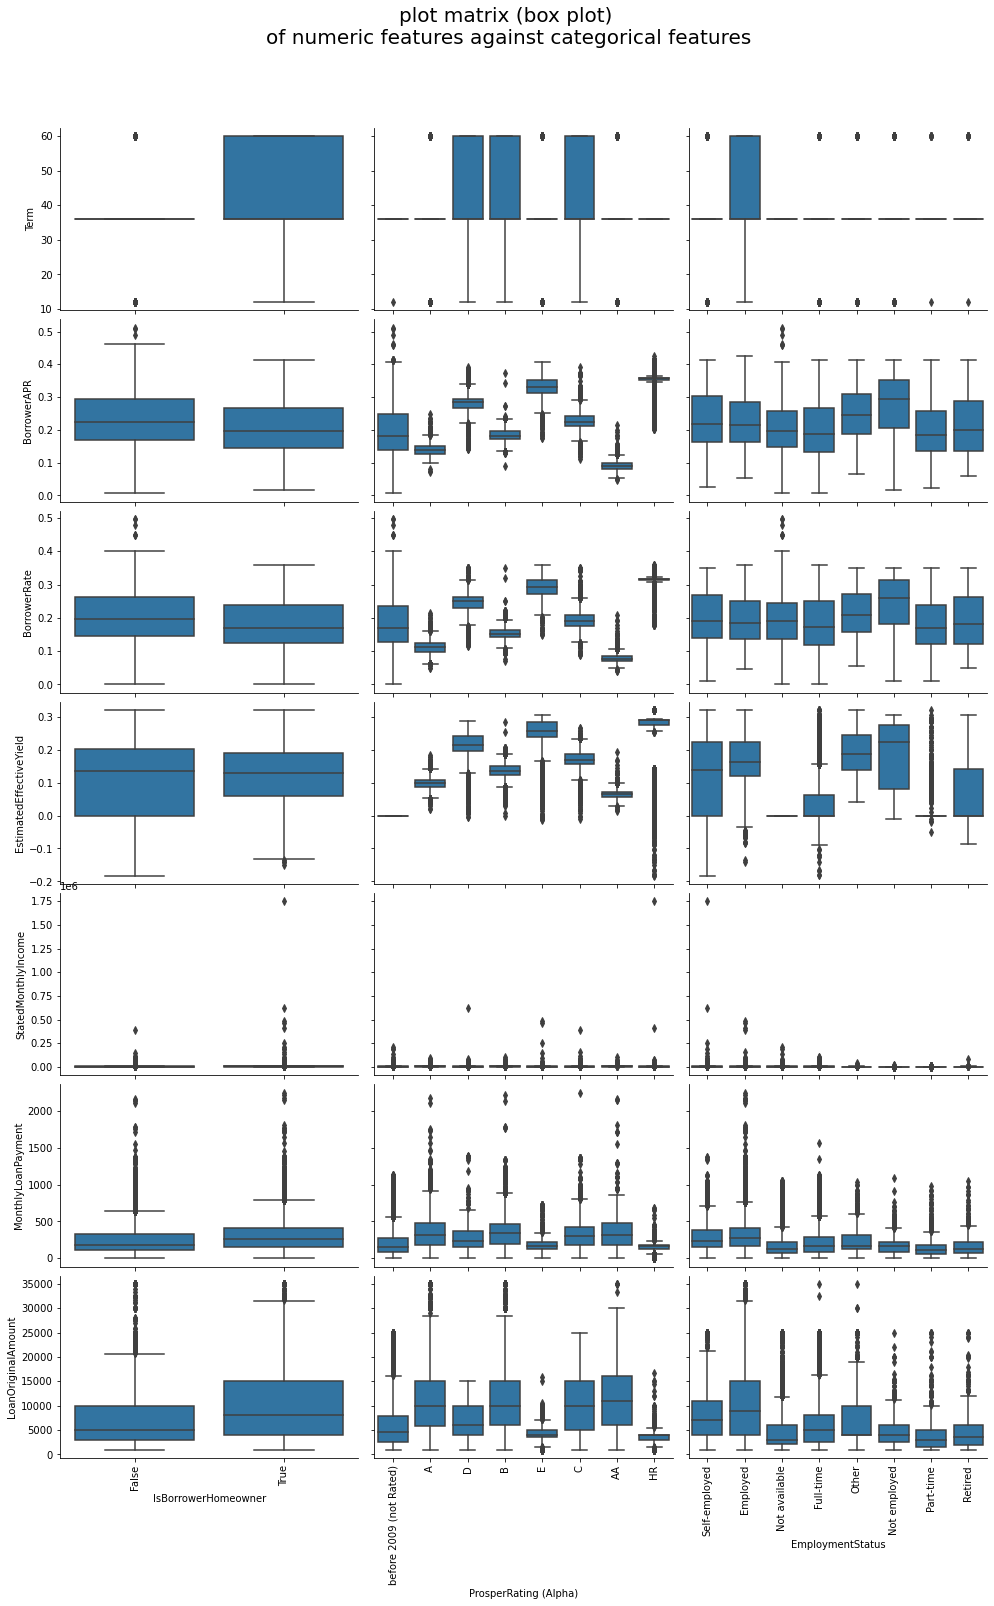

In [27]:
# plot matrix of numeric features against categorical features.

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0];
    sb.boxplot(x, y, color = default_color)
    plt.xticks(rotation=90);

plt.figure(figsize = [30, 10]);
g = sb.PairGrid(data = new_load_df, y_vars = numeric_vars, x_vars = categoric_vars,
                size = 3, aspect = 1.5);
g.map(boxgrid,order= ['before 2009 (not Rated)','HR','E','D','C','B','A','AA']);

plt.subplots_adjust(top=0.9);
g.fig.suptitle("plot matrix (box plot) \nof numeric features against categorical features",size=20);
plt.show();

> For the **point plot of numeric features change over the years**

>> For the **Term Feature**

>>> All Borrowers are home owners

>>> Most Borrowers have ProsperRate D - C - B with equal anounts

>>> Most Borrowers with **high Term*** are home owners


>> For the **BorrowAPR and BorrowRate Features**

>>> Not home owner > home owners 

>>> For ProsperRate, **HR** >  **E** > **D** > **Not Rated** > **C** > **B** > **A** > **AA**

>>> For EmploymentSatus, **Not employed** > **other** > **Self-Employed** >   **retired**> **Employed**  >  **full-time** > **not available**  > **Part-time**


>> For the **EstimatedEffectiveYield Feature**

>>> Not home owner > home owners 

>>> For ProsperRate, **HR** >  **E** > **D** > **C** > **B** > **A** > **AA**

>>>> No **Not Rated Rate** maybe it was very low before 2009

>>> For EmploymentSatus, **Not employed** > **other** > **Self-Employed** >   **retired**> **Employed**  >  **full-time** > **Part-time** > **not available** 


>> For the **StatedMonthlyIncome Feature**

>>> All boxes are at zero with tall tails


>> For the **MonthlyLoanPayment and LoanOiginalAmount Features**

>>> Both features has similar shapes and they hold similar bositions but the **LoanOiginalAmount Feature** is bigger 

>>> For homowners, most borrowers and the biggest borrowesr are home home owners but the an values are  

>>> For ProsperRate, **AA rate** has the the highest of all loans, then  **B - C - A rates** have nearly similar values,
then **D** then **Not Rated** then **E** then **HR**

>>> For EmploymentSatus,**Employed** > **Self-Employed** > **other** > **full-time** > **not available** > **Not employed** > **retired** > **Part-time**

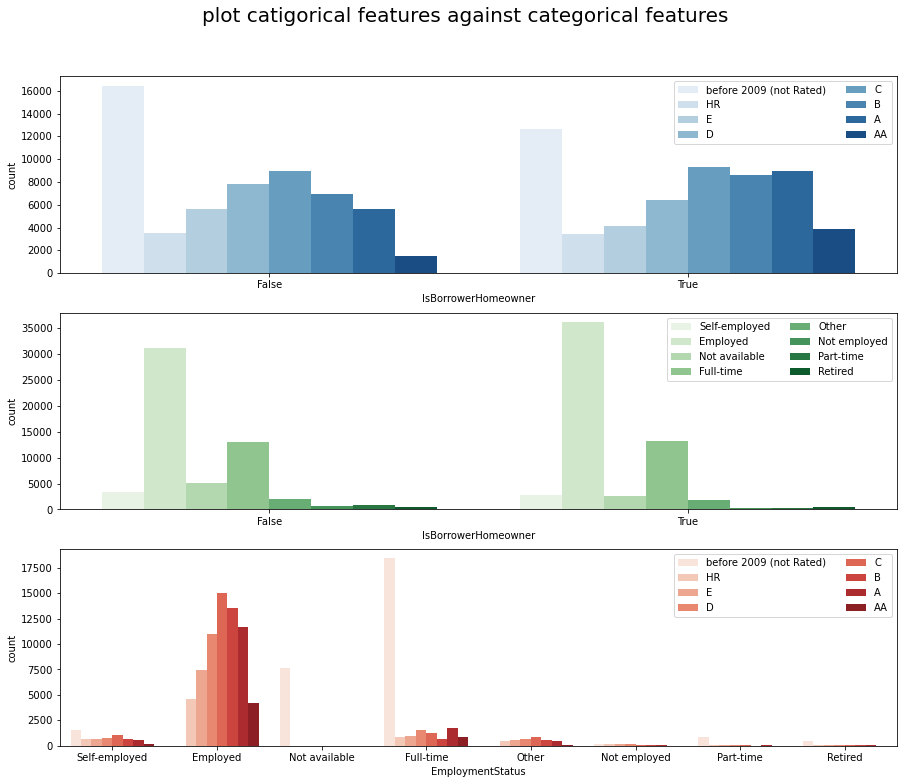

In [28]:
# plot catigorical va catigorical

plt.figure(figsize = [15, 12])

# subplot 1: IsBorrowerHomeowner vs ProsperRating
ax = plt.subplot(3, 1, 1)
sb.countplot(data = new_load_df, x = 'IsBorrowerHomeowner', hue = 'ProsperRating (Alpha)', palette = 'Blues'
             , hue_order= ['before 2009 (not Rated)','HR','E','D','C','B','A','AA'])
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

# subplot 2: IsBorrowerHomeowner vs. EmploymentStatus
ax = plt.subplot(3, 1, 2)
sb.countplot(data = new_load_df, x = 'IsBorrowerHomeowner', hue = 'EmploymentStatus', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: EmploymentStatus vs. ProsperRating
ax = plt.subplot(3, 1, 3)
sb.countplot(data = new_load_df, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'Reds'
             ,hue_order= ['before 2009 (not Rated)','HR','E','D','C','B','A','AA'])

ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.subplots_adjust(top=0.9)
plt.suptitle("plot catigorical features against categorical features",size=20)
plt.show();

>the ProsperRate with highest count is **0** which rpresent the loans before 2009

> The lower the ProsperRate the higher the count eccept foor the C and B ProperRate as they spike greatly 

> And as expected the employed, Fll-time and self-employed hold the most counts 
but it is not ordinal feature so we can't really specify a linear increament as in prosper rate

vilon plot of numeric features chages over the years


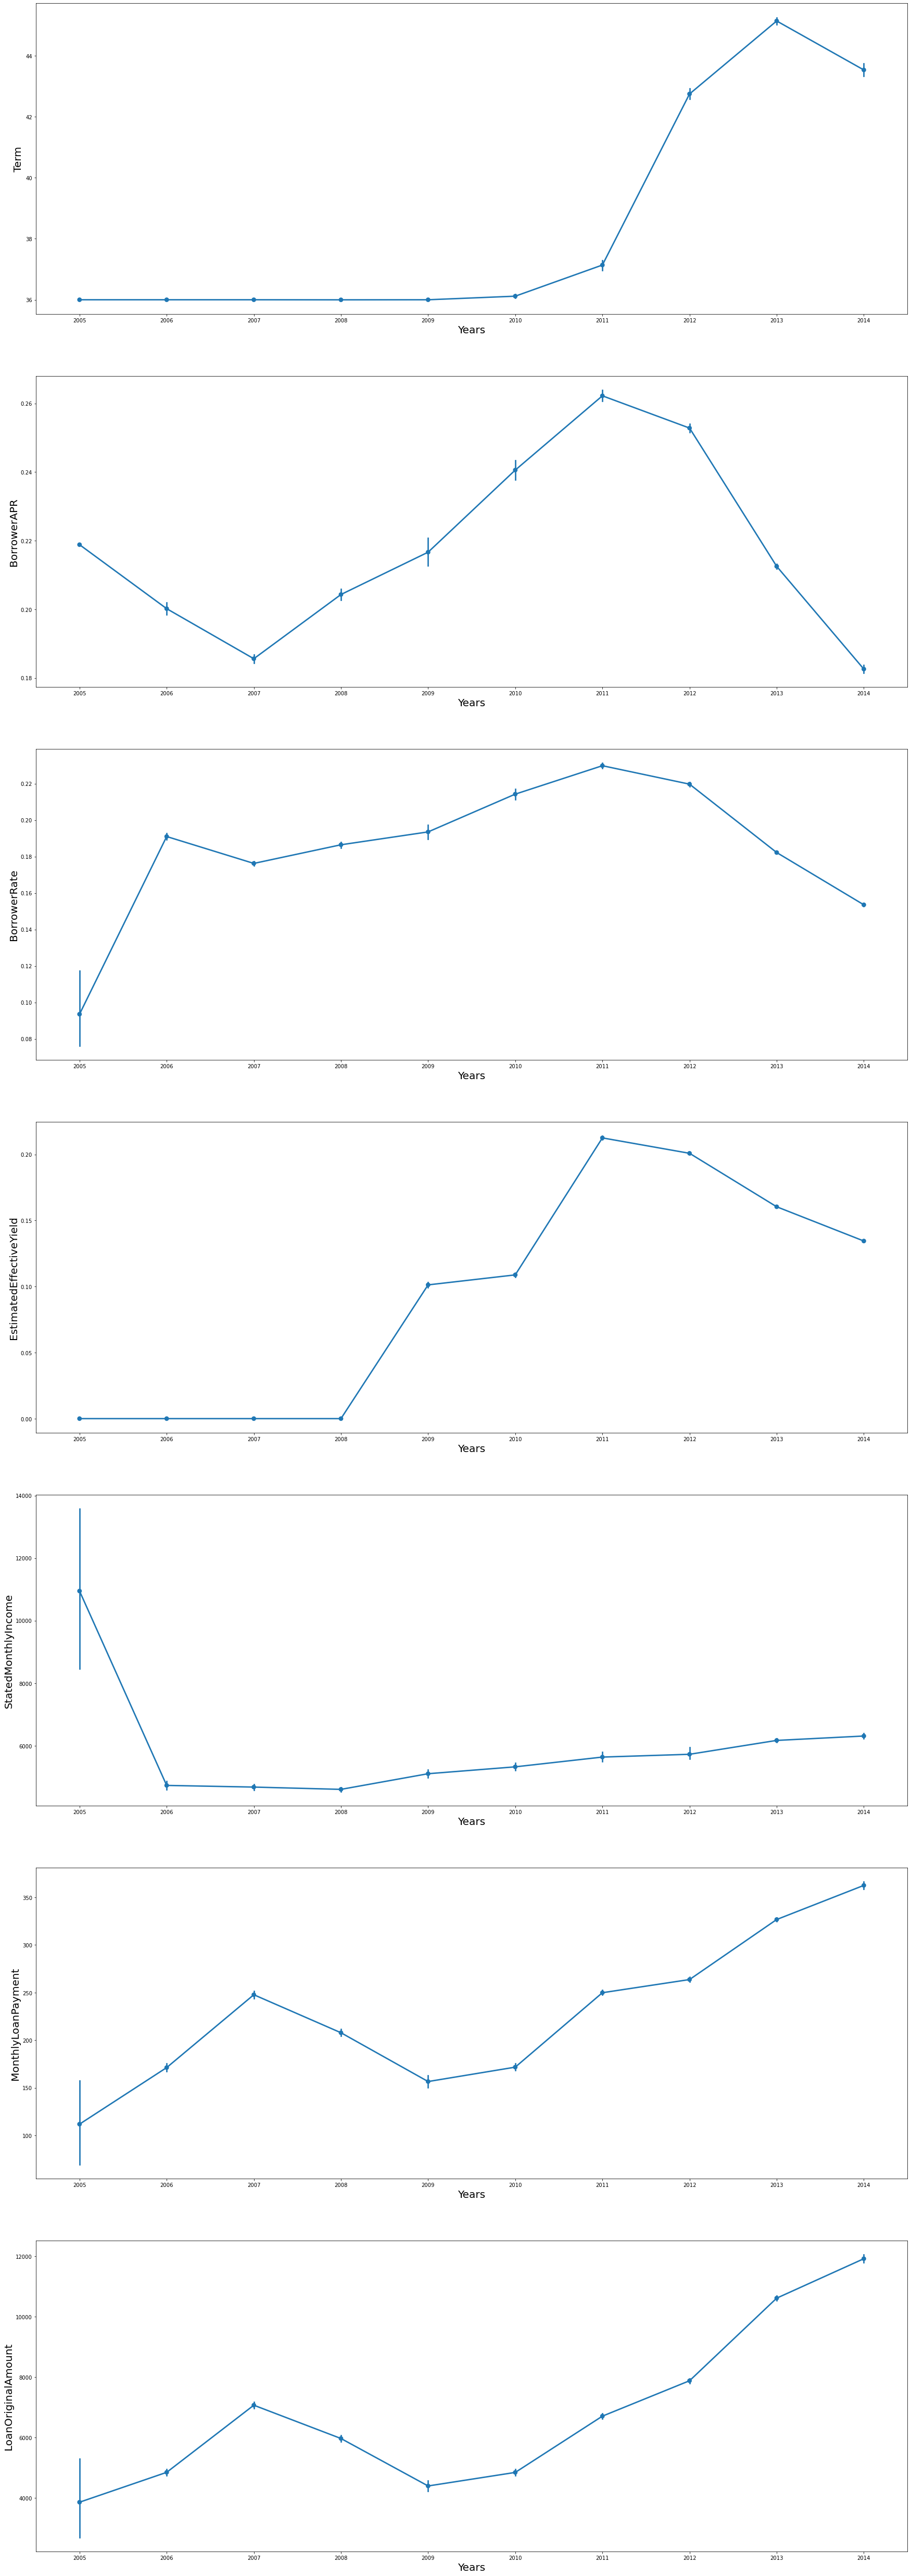

In [29]:
# point plot of numeric features change over the years
# The same as violin but simpler visualsation

print("vilon plot of numeric features chages over the years")

fig, ax = plt.subplots(ncols = 1, nrows = 7 , figsize = [30,90])

for i in range(len(numeric_vars)):
    var = numeric_vars[i]
    sb.pointplot(data = new_load_df, x=new_load_df.ListingCreationDate.dt.year, y = var
                  , ax = ax[i], color=sb.color_palette()[0])
    ax[i].set_xlabel('Years',fontsize=20);
    ax[i].set_ylabel(var,fontsize=20);

plt.show();


> There are three features increases with years Like:
>> Term, MonthhlyLoanPayment, LoanOriginalAmount, EstimatedEffectiveYield

> There are three features Decrease with years Like:
>> StatedMothlyIncome, BorrowAPR, BorrowRate

> Most the feature spike up specially at 2011 and 2012

> BorrowAPR, BorrowRate and EstimatedEffectiveYield decrease greatly after 2011

> All the feature up or down spike happens around 2007, 2009, 2011 and 2012

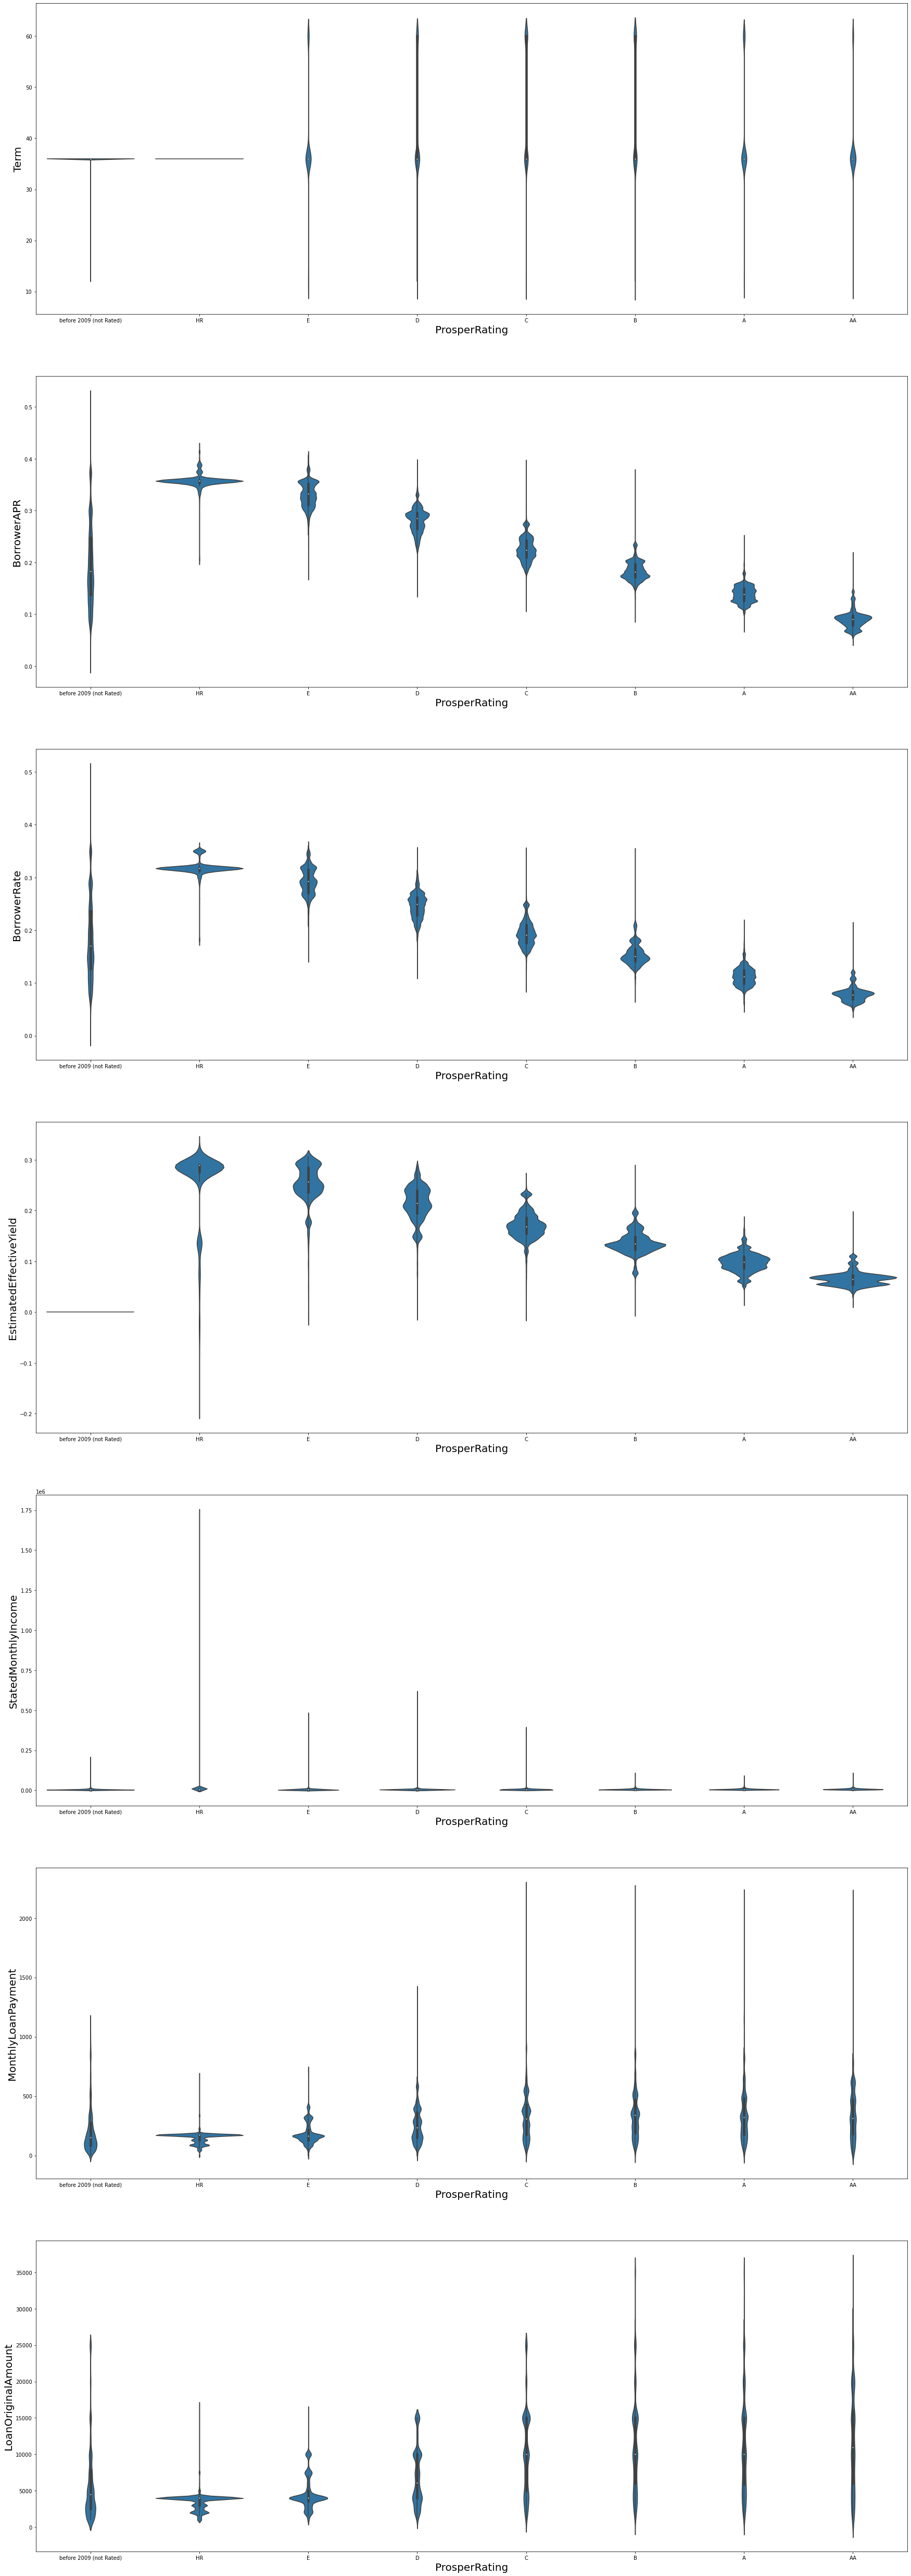

In [30]:
# violin matrix of numeric features against nuerical variables

fig, ax = plt.subplots(ncols = 1, nrows = 7 , figsize = [30,90])

for i in range(len(numeric_vars)):
    var = numeric_vars[i]
    
    sb.violinplot(data = new_load_df, x = 'ProsperRating (Alpha)', y = var
                  , ax = ax[i], color=sb.color_palette()[0]
                  , order= ['before 2009 (not Rated)','HR','E','D','C','B','A','AA'])
    
    ax[i].set_xlabel('ProsperRating',fontsize=20);
    ax[i].set_ylabel(var,fontsize=20);

plt.show()

> For the **violin plot of numeric features against RrosperRating**

>> For the **Term Feature**

>>> For the rates **E,D,C,B,A,AA**, the term is **highest** 

>>> For the rates **NotRated**, the term is **lowest** 

>>> For the rate **HR**, the term is same level as the others but it doesn't increase or decrease 


>> For the **BorrowAPR and BorrowRate Features**

>>> For the rate **HR**, the term has the biggest range but the lowest number 

>>> The other rates are as following, **HR** >  **E** > **D** > **C** > **B** > **A** > **AA**


>> For the **EstimatedEffectiveYield Feature**

>>> For the rate **Not Rated**, the term is same level as the others but it doesn't increase or decrease

>>> The other rates are as following, **HR** >  **E** > **D** > **C** > **B** > **A** > **AA** 


>> For the **StatedMonthlyIncome Feature**

>>> For the rate **C,B,A,AA**, the term is same level and the same range wich is the highest of the other rates

>>> For the rate **HR,E,D**, the term is same level and the same range which is the second highest of the other rates

>>> For the rate **Not Rated**, the term is same level and the same range which is the third highest of the other rates

>>> For the rate **HR,E**, the term is same level a and same range which is the lowest of the other rates


>> For the **MonthlyLoanPayment and LoanOiginalAmount Features**

>>> For the rate **B,A,AA**, the term is same level and the same range wich is the highest of the other rates

>>> For the rate **HR,E,D**, the term is same level and the same range which is the second highest of the other rates

>>> For the rate **Not Rated,C**, the term is same level a and same range which is the lowest of the other rates

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>> The ProsperRate with highest count is **0** which rpresent the loans before 2009

>> The lower the ProsperRate the higher the count eccept foor the C and B ProperRate as they spike greatly 

>> And as expected the employed, Fll-time and self-employed hold the most counts 
but it is not ordinal feature so we can't really specify a linear increament as in prosper rate


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>> Most the feature spike up specially at 2011 and 2012

>> BorrowAPR, BorrowRate and EstimatedEffectiveYield decrease greatly after 2011

>> All the feature up or down spike happens around 2007, 2009, 2011 and 2012

## Multivariate Exploration

> We will focus on the relationship between the numerical features: LoanOriginalAmount and BorrowerAPR
and the catagorical: ProsperRating and EmploymentStatus over the years

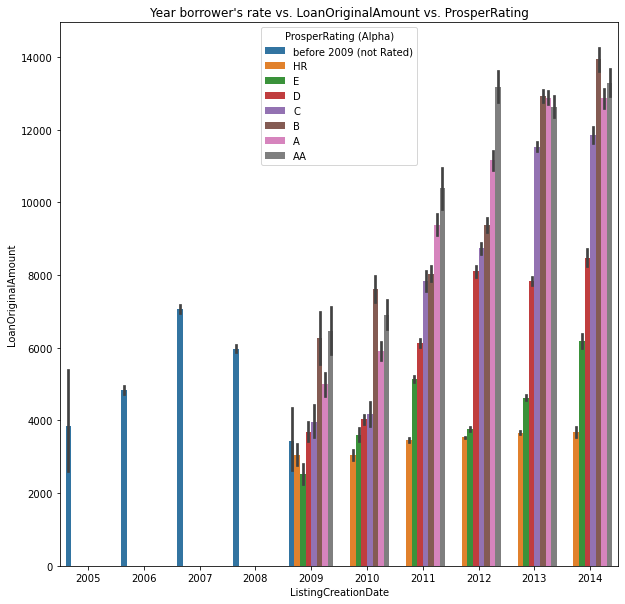

In [31]:
plt.figure(figsize=[10, 10]);
sb.barplot(data = new_load_df, x = new_load_df.ListingCreationDate.dt.year, y = 'LoanOriginalAmount'
           , hue = 'ProsperRating (Alpha)',hue_order= ['before 2009 (not Rated)','HR','E','D','C','B','A','AA']);
plt.title('Year borrower\'s rate vs. LoanOriginalAmount vs. ProsperRating');

> For the **'Year borrower\'s rate vs. LoanOriginalAmount vs. ProsperRating'**

>> The are about 30000 Loans issued before 2009

>> The ProsperRate with the **highest counts** in most years after 2009 is **B** then **c**

>> on the years 2011 and 2012, most Loans are of **ProsperRate (AA)**

>> The loans with the **lowest Value** on all years are of  **ProsperRate (HR)**, except for **year 2009**

>> om year 2009, the **ProsperRate (E)** has the **lowest value**

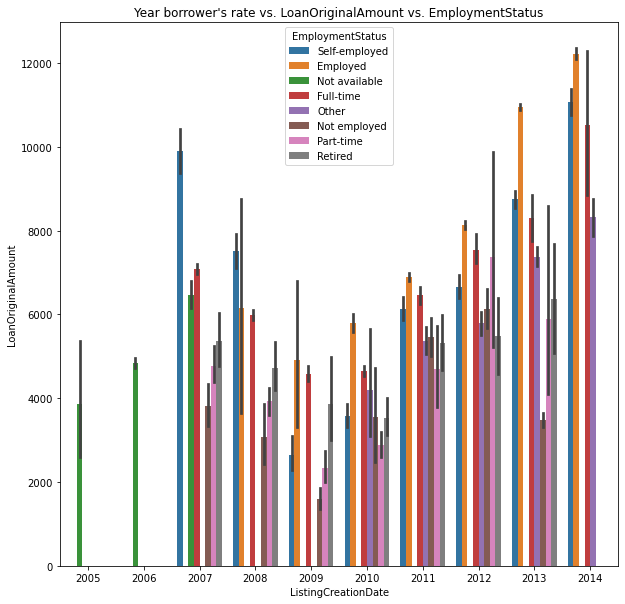

In [32]:
plt.figure(figsize=[10, 10]);
sb.barplot(data = new_load_df, x = new_load_df.ListingCreationDate.dt.year, y = 'LoanOriginalAmount'
           , hue = 'EmploymentStatus');
plt.title('Year borrower\'s rate vs. LoanOriginalAmount vs. EmploymentStatus');

> For the **'Year borrower\'s rate vs. LoanOriginalAmount vs. EmploymentStatus'**

>> The are about 9000 Loans issued before 2009

>> The EmploymentStatus with the **highest value** in most years after 2009 is **Employed**

>> on the year 2007, most Borrowers were **Self-Employed**

>> on the year 2009, most Borrowers were of **other catigories**

>> The borrower with the lowest loan values most of the years were **Not-Employed** 

>> there were years when the **Not-Employed** the didn't take any loans like: 2007-2008-2009-2014-2013

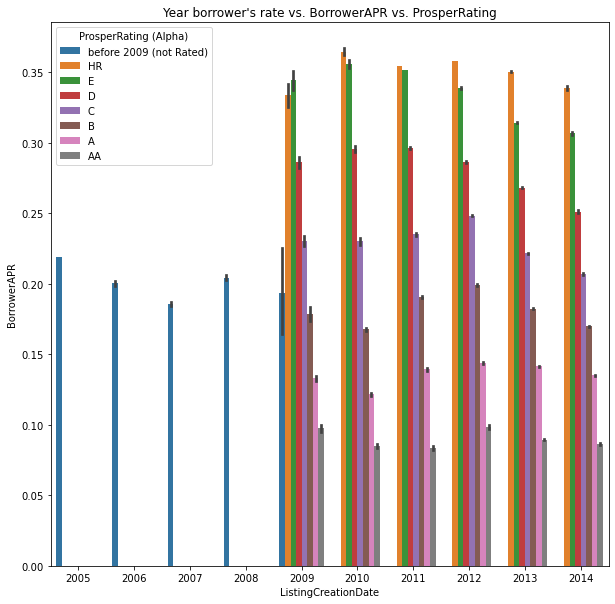

In [33]:
plt.figure(figsize=[10, 10]);
sb.barplot(data = new_load_df, x = new_load_df.ListingCreationDate.dt.year, y = 'BorrowerAPR'
           , hue = 'ProsperRating (Alpha)',hue_order= ['before 2009 (not Rated)','HR','E','D','C','B','A','AA']);
plt.title('Year borrower\'s rate vs. BorrowerAPR vs. ProsperRating');

> For the **'Year borrower\'s rate vs. BorrowerAPR vs. ProsperRating'**

>> The are about 0.25 Loans issued before 2009

>> over the years, the values of **BorrowerAPR** of all **ProsperRating** are almost the same
and they hold the ae ranking excpt for year 2009

>> In all years from 2010 to 2014, the **ProsperRating** from **highest to lowest** was

>>> **HR, E, D, C, B, A then AA**

>> on the year 2009, the **ProsperRating** from **highest to lowest** was 

>>> E, HR, D, C, Not Rated, B, A then AA**


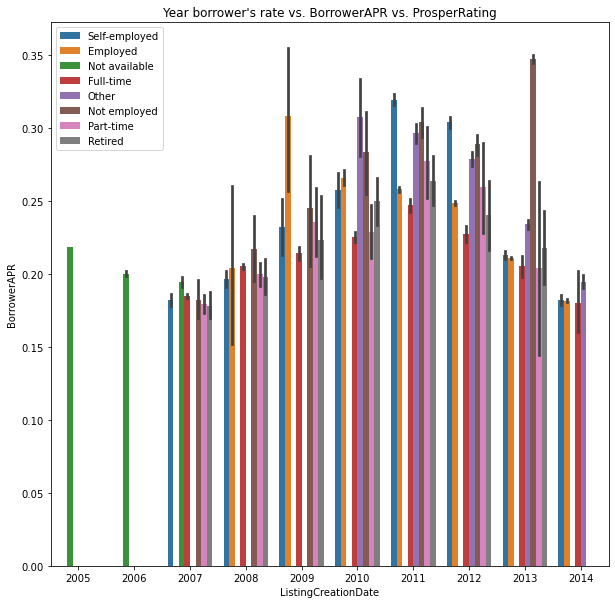

In [34]:
plt.figure(figsize=[10, 10]);
sb.barplot(data = new_load_df, x = new_load_df.ListingCreationDate.dt.year, y = 'BorrowerAPR'
           , hue = 'EmploymentStatus');
plt.legend(loc = 2, ncol = 1);
plt.title('Year borrower\'s rate vs. BorrowerAPR vs. ProsperRating');

> For the **'Year borrower\'s rate vs. BorrowerAPR vs. EmploymentStatus'**

>> The are about 0.25 Loans issued before 2007

>> on the years 2007 and 2014, the results are almost identicals

>> on the years 2008 and 2013, the results are almost identicals

>> on the years 2009 and 2012, the results are almost identicals

>> on the years 2010 and 2011, the results are almost identicals

>> The **Employed** catigory had the **highest BorrowAPR** only on 2009

>> The **Not-Employed** catigory had the **highest BorrowAPR** only on 2013

>> The **Self-Employed** catigory had the **highest BorrowAPR** only on 2011 and 2012

>> The **other catigories** catigory had the **highest BorrowAPR** only on 2010 and 2014

>> The **Full-Time** catigory had the **lowest BorrowAPR** over the years except for 2007-2008

>> on the years 2007 and 2008, the **lowest BorrowAPR** are **Part-Time and other** catigories

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Estimated Effective Yeild increases with time
> LoanOriginal Amount increases alot with time

### Were there any interesting or surprising interactions between features?

> Stated income is not changing overtime, which means it's not updating which is benifiting for the borrowers

### Export the cleaned data to a new csv file 

In [35]:
new_load_df.to_csv(r'CleanedLoanData.csv', index = False)

In [36]:
new = pd.read_csv('CleanedLoanData.csv')
new

,ListingNumber,ListingCreationDate,Term,BorrowerAPR,BorrowerRate,EstimatedEffectiveYield,ProsperRating (Alpha),IsBorrowerHomeowner,CurrentlyInGroup,EmploymentStatus,StatedMonthlyIncome,MonthlyLoanPayment,LoanOriginalAmount
0,193129,2007-08-26 19:09:29.263,36,0.16516,0.1580,0.00000,before 2009 (not Rated),True,True,Self-employed,3083.333333,330.43,9425
1,1209647,2014-02-27 08:28:07.900,36,0.12016,0.0920,0.07960,A,False,False,Employed,6125.000000,318.93,10000
2,81716,2007-01-05 15:00:47.090,36,0.28269,0.2750,0.00000,before 2009 (not Rated),False,True,Not available,2083.333333,123.32,3001
3,658116,2012-10-22 11:02:35.010,36,0.12528,0.0974,0.08490,A,True,False,Employed,2875.000000,321.45,10000
4,909464,2013-09-14 18:38:39.097,36,0.24614,0.2085,0.18316,D,True,False,Employed,9583.333333,563.97,15000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,2013-04-14 05:55:02.663,36,0.22354,0.1864,0.16490,C,True,False,Employed,4333.333333,364.74,10000
113933,537216,2011-11-03 20:42:55.333,36,0.13220,0.1110,0.10070,A,True,False,Employed,8041.666667,65.57,2000
113934,1069178,2013-12-13 05:49:12.703,60,0.23984,0.2150,0.18828,D,True,False,Employed,2875.000000,273.35,10000
113935,539056,2011-11-14 13:18:26.597,60,0.28408,0.2605,0.24450,C,True,False,Full-time,3875.000000,449.55,15000


In [37]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ListingNumber            113937 non-null  int64  
 1   ListingCreationDate      113937 non-null  object 
 2   Term                     113937 non-null  int64  
 3   BorrowerAPR              113937 non-null  float64
 4   BorrowerRate             113937 non-null  float64
 5   EstimatedEffectiveYield  113937 non-null  float64
 6   ProsperRating (Alpha)    113937 non-null  object 
 7   IsBorrowerHomeowner      113937 non-null  bool   
 8   CurrentlyInGroup         113937 non-null  bool   
 9   EmploymentStatus         113937 non-null  object 
 10  StatedMonthlyIncome      113937 non-null  float64
 11  MonthlyLoanPayment       113937 non-null  float64
 12  LoanOriginalAmount       113937 non-null  int64  
dtypes: bool(2), float64(5), int64(3), object(3)
memory usage: 9